## Testing Won't Save Us

Testing will not save us


In [7]:
import sys
# Install required packages
!{sys.executable} -mpip -q install matplotlib seaborn statsmodels pandas publicdata metapack

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import metapack as mp
import rowgenerators as rg
import publicdata as pub
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [18]:
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/covidtracking.com-covid19-1.2.5.csv')

states_df = pkg.resource('states').dataframe()
states_df.head()

,date,state,positive,negative,pending,hospitalized,death,total,datechecked,totaltestresults,deathincrease,hospitalizedincrease,negativeincrease,positiveincrease,totaltestresultsincrease
0,20200326,AK,59.0,1801.0,NaN,3.0,1.0,1860,2020-03-26 20:00:00,1860,0.0,2.0,152.0,17.0,169.0
1,20200326,AL,506.0,3593.0,NaN,NaN,1.0,4099,2020-03-26 20:00:00,4099,1.0,0.0,1064.0,223.0,1287.0
2,20200326,AR,335.0,1504.0,0.0,41.0,3.0,1839,2020-03-26 20:00:00,1839,1.0,19.0,67.0,55.0,122.0
3,20200326,AS,0.0,NaN,NaN,NaN,0.0,0,2020-03-26 20:00:00,0,0.0,0.0,0.0,0.0,0.0
4,20200326,AZ,577.0,347.0,33.0,66.0,8.0,957,2020-03-26 20:00:00,924,2.0,58.0,24.0,127.0,151.0


In [43]:
# 6 states with the most tests
states = list(states_df.groupby('state').totaltestresults.mean().sort_values(ascending=False).iloc[:6].index)

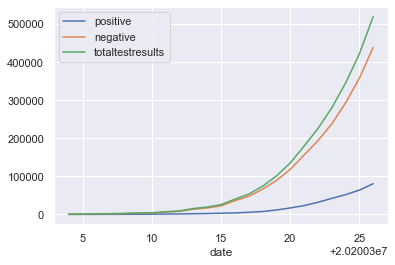

In [45]:
t = states_df.groupby('date').sum().reset_index()
t.plot(x='date',y=['positive','negative','totaltestresults'])

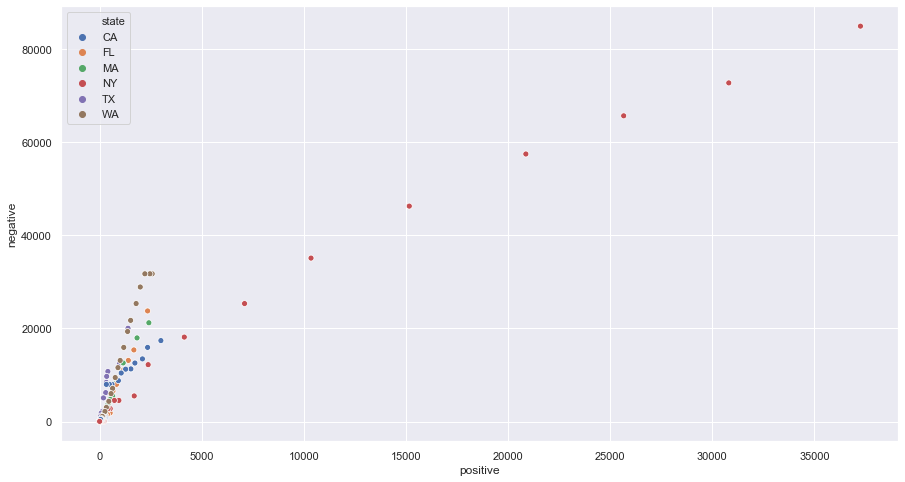

In [50]:
t = states_df[['date', 'state', 'positive', 'negative', 'pending', 'hospitalized','death', 'totaltestresults','total']].copy()

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='positive',y='negative',data=t[t.state.isin(states)], hue='state', ax=ax)

In [65]:
t = states_df[['date', 'state', 'positive', 'negative', 'pending', 'hospitalized','death', 'totaltestresults','total']].copy()
t = t[['state','positive','negative']].groupby('state').corr().unstack()
t.columns = t.columns.get_level_values(0)
t.iloc[:,1].to_frame().describe()



,negative
count,53.000000
mean,0.934583
std,0.114977
min,0.376827
25%,0.937244
50%,0.974692
75%,0.987924
max,0.999287
